# Bootstrap Walkthrough
Messing around with the bootstrap library in the chainladder package to determine if method is sufficient to replace an arbitrary benchmark approach for IFRS 17 margins

In [24]:
import chainladder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sample = chainladder.load_sample('raa')

In [8]:
sample

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704",
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466",,
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067",,,
1985,"1,092","9,565","15,836","22,169","25,955","26,180",,,,
1986,"1,513","6,445","11,702","12,935","15,852",,,,,
1987,557,"4,020","10,946","12,314",,,,,,
1988,"1,351","6,947","13,112",,,,,,,
1989,"3,133","5,395",,,,,,,,
1990,"2,063",,,,,,,,,


In [30]:
sample.age_to_age

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
1981,1.6498,1.3190,1.0823,1.1469,1.1951,1.1130,1.0333,1.0029,1.0092
1982,40.4245,1.2593,1.9766,1.2921,1.1318,0.9934,1.0434,1.0331,
1983,2.6370,1.5428,1.1635,1.1607,1.1857,1.0292,1.0264,,
1984,2.0433,1.3644,1.3489,1.1015,1.1135,1.0377,,,
1985,8.7592,1.6556,1.3999,1.1708,1.0087,,,,
1986,4.2597,1.8157,1.1054,1.2255,,,,,
1987,7.2172,2.7229,1.1250,,,,,,
1988,5.1421,1.8874,,,,,,,
1989,1.7220,,,,,,,,


<Axes: >

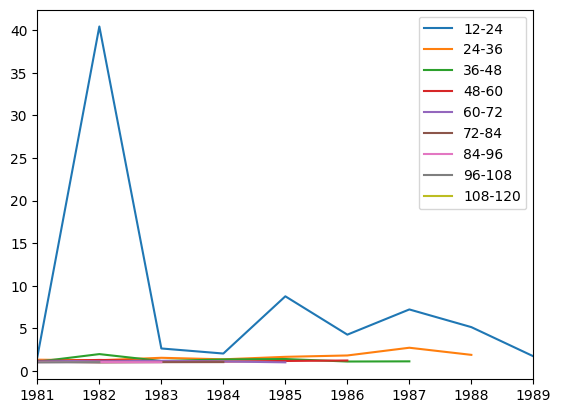

In [11]:
sample.link_ratio.plot()

In [19]:
cl_sample = chainladder.Chainladder().fit(sample)

In [27]:
sample.link_ratio.heatmap()

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
1981,1.6498,1.3190,1.0823,1.1469,1.1951,1.1130,1.0333,1.0029,1.0092
1982,40.4245,1.2593,1.9766,1.2921,1.1318,0.9934,1.0434,1.0331,
1983,2.6370,1.5428,1.1635,1.1607,1.1857,1.0292,1.0264,,
1984,2.0433,1.3644,1.3489,1.1015,1.1135,1.0377,,,
1985,8.7592,1.6556,1.3999,1.1708,1.0087,,,,
1986,4.2597,1.8157,1.1054,1.2255,,,,,
1987,7.2172,2.7229,1.1250,,,,,,
1988,5.1421,1.8874,,,,,,,
1989,1.7220,,,,,,,,


In [20]:
cl_sample.ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120,120-132,132-144
(All),2.9994,1.6235,1.2709,1.1717,1.1134,1.0419,1.0333,1.0169,1.0092,1.0000,1.0000


In [68]:
n_iterations = 10000  # Specify the number of bootstrap iterations
# fitted_model = chainladder.Chainladder().fit(sample)
# bootstrap_results = fitted_model.BootstrapODPSample(n_iterations=n_iterations)

reserve_estimates = chainladder.BootstrapODPSample(n_sims=n_iterations).fit_transform(sample)
cl_bootstrapped = chainladder.Chainladder().fit(reserve_estimates).ibnr_
cl_bootstrapped

c:\Users\tmoodle3\AppData\Local\Programs\Python\Python312\Lib\site-packages\chainladder\utils\weighted_regression.py:84: RuntimeWarning: invalid value encountered in sqrt
  residual = (y - fitted_value) * xp.sqrt(w)
c:\Users\tmoodle3\AppData\Local\Programs\Python\Python312\Lib\site-packages\chainladder\development\development.py:173: RuntimeWarning: invalid value encountered in sqrt
  / xp.swapaxes(xp.sqrt(x ** (2 - exponent))[..., 0:1, :], -1, -2)
c:\Users\tmoodle3\AppData\Local\Programs\Python\Python312\Lib\site-packages\chainladder\development\development.py:182: RuntimeWarning: invalid value encountered in sqrt
  std = xp.sqrt((1 / num_to_nan(w)) * (self.sigma_**2).values)
c:\Users\tmoodle3\AppData\Local\Programs\Python\Python312\Lib\site-packages\chainladder\tails\base.py:120: RuntimeWarning: overflow encountered in exp
  sigma_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
c:\Users\tmoodle3\AppData\Local\Programs\Python\Python312\Lib\site-packages\chainladder\tails\base.py:124:

,Triangle Summary
Valuation:,2261-12
Grain:,OYDY
Shape:,"(10000, 1, 10, 1)"
Index:,[Total]
Columns:,[values]


In [69]:
cl_bootstrapped = [cl_bootstrapped.iloc[i].sum() for i in range(n_iterations)]
cl_bootstrapped.sort()

In [80]:
mean = sum(cl_bootstrapped)/len(cl_bootstrapped)
print(mean)

53510.83382791206


In [83]:
fifty_percent = cl_bootstrapped[5000]
seventy_five_percent = cl_bootstrapped[7500]
risk_adjustment_factor = seventy_five_percent/fifty_percent - 1
print(risk_adjustment_factor)

0.2682028100762126


In [82]:
risk_adjustment_factor = seventy_five_percent - fifty_percent
print(risk_adjustment_factor)

13751.416274801726


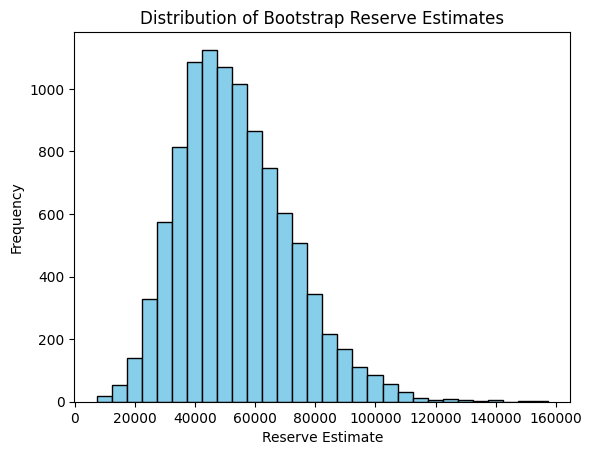

In [72]:
# Plot the distribution of reserve estimates
plt.hist(cl_bootstrapped, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Bootstrap Reserve Estimates')
plt.xlabel('Reserve Estimate')
plt.ylabel('Frequency')
plt.show()